# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("/content/car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df.shape

(804, 12)

Tasks, Part 1

1 Find the linear regression equation for mileage vs price.

2 Chart the original data and the equation on the chart.

3 Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
#1 Find the linear regression equation for mileage vs price.
x = df['Mileage']
x=x.to_frame()
y = df['Price']

In [ ]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
print('intercept :',model.intercept_)
print('Coefficient :',model.coef_)

intercept : 24764.559006061685
Coefficient : [-0.1725205]


In [ ]:
print('The Linear Regression Equation: y = {:.4f}*X + {:.4f}'.format(model.coef_[0],model.intercept_))

The Linear Regression Equation: y = -0.1725*X + 24764.5590


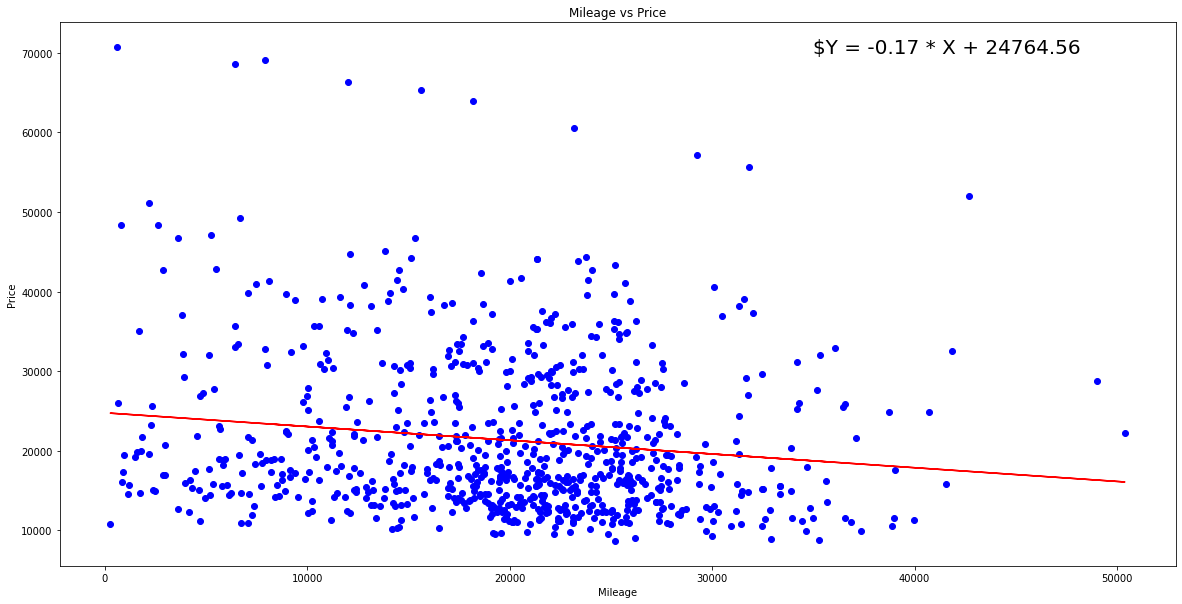

In [ ]:
#2 Chart the original data and the equation on the chart.
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.scatter(x,y,color= "blue")
plt.plot(x,model.predict(x),color = 'red')
plt.text(35000,70000,"$Y = %.2f * X + %.2f" % (model.coef_,model.intercept_),fontsize=20)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
#3 Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
print('R squared score:{:.4f}'.format(model.score(x,y)))

R squared score:0.0205


Because this is below 0.8, this is not a good fit for this data.

Tasks, Part 2

1 Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

2 Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

3 Find the combination of the factors that is the best predictor for price.

In [ ]:
#1 Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
feature =['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
price= ['Price']

In [ ]:
x = df[feature]
y = df[price]

In [ ]:
model1 = linear_model.LinearRegression()
model1.fit(x,y)

LinearRegression()

In [ ]:
print(' Linear Regression Equation of {}: Y = {} * X + {}'
       .format(feature,model1.coef_,model1.intercept_))

 Linear Regression Equation of ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']: Y = [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]] * X + [6758.7551436]


In [ ]:
#2 Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

print('R Squared score :{:.4f}'.format(model1.score(x,y)))

R Squared score :0.4463


Because it is below 0.8, this is not considered a strong correlation

Tasks, Hard Mode

1 Research dummy variables in scikit-learn to see how to use the make, model, and body type.

2 Find the best combination of factors to predict price.

In [ ]:
#1 Research dummy variables in scikit-learn to see how to use the make, model, and body type.


In [ ]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])
df_with_dummies

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_with_dummies.columns

Index(['Price', 'Mileage', 'Trim', 'Cylinder', 'Liter', 'Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'],
      dtype='object')

In [ ]:
columns=['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5'
       ]

In [ ]:
X = df_with_dummies[columns]
y = df_with_dummies['Price']

In [ ]:
model1 = linear_model.LinearRegression()
model1.fit(X,y)

LinearRegression()

In [ ]:
print('intercept :',model1.intercept_)
print('coefficient :',model1.coef_)
print('score :',model1.score(X,y))

intercept : 3.637978807091713e-12
coefficient : [ 1.00000000e+00 -4.42324403e-17 -5.39858741e-14  2.86012748e-14
  1.81557853e-14 -1.59312492e-14 -6.25458543e-14 -8.77284985e-14
 -1.24388135e-13  9.45577195e-15  1.28652952e-13  4.11729307e-14
 -5.63687912e-14  1.47526682e-15 -2.83298533e-13 -3.67116818e-14
 -9.17867074e-14 -7.69717289e-14]
score : 1.0


In [ ]:
#2 Find the best combination of factors to predict price.
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing

In [ ]:
combos = []
   
for i in range(1, 11):
    combos.append(itertools.combinations(feature, i))

In [ ]:
check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        degrees = 8
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
            model = model1.fit(x,y)
            model_score = model.score(x, y)
        if check_score < model.score(x, y):
            check_score = model.score(x, y)
            maxgroup = groupx
            best_degree = degree
            
print(degree, maxgroup, check_score)

7 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.4462643536728379
